In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
anpc = pd.read_csv('data_with_incidentes.csv')

In [5]:
anpc.head()

,Numero,DataOcorrencia,DataFechoOperacional,Natureza,EstadoOcorrencia,Distrito,Concelho,Freguesia,Localidade,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos,Grouped
0,2016150002576,09/01/2016 14:02:00,09/01/2016 17:30:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,SETÚBAL,MOITA,Gaio-Rosário e Sarilhos Pequenos,Gaio- Rosario,"38,68091202","-9,002235449",1.0,3.0,0.0,0.0,Assistência e Prevenção
1,2016010098470,10/01/2016 00:30:00,NaN,Protecção e Assistência a Pessoas e Bens / Ass...,Em Curso,AVEIRO,ALBERGARIA-A-VELHA,Albergaria-a-Velha e Valmaior,Rua 25 de Abril - Assilhó - Albergaria-a-Velha,"40,6927855","-8,479686736",0.0,0.0,0.0,0.0,Assistência e Prevenção
2,2016020002249,24/01/2016 18:57:00,24/01/2016 19:53:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,BEJA,CASTRO VERDE,Castro Verde e Casével,"CASTRO VERDE-Rua Bento J. Carraça,6","37,71278977","-8,091107843",2.0,4.0,0.0,0.0,Assistência e Prevenção
3,2016050041560,30/01/2016 23:38:00,NaN,Protecção e Assistência a Pessoas e Bens / Ass...,Em Curso,CASTELO BRANCO,VILA DE REI,Vila de Rei,Vila de Rei,"39,6684201","-8,146938534",1.0,2.0,0.0,0.0,Assistência e Prevenção
4,2016020003825,13/02/2016 00:10:00,13/02/2016 01:35:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,BEJA,CASTRO VERDE,Santa Bárbara de Padrões,"SETE-Rua da Graça, 4","37,6149714","-7,962115173",1.0,2.0,0.0,0.0,Assistência e Prevenção


In [6]:
anpc['DataOcorrencia'] = pd.to_datetime(anpc['DataOcorrencia'], errors='coerce')
anpc['DataFechoOperacional'] = pd.to_datetime(anpc['DataFechoOperacional'], errors='coerce')

data = anpc.dropna(subset=['DataOcorrencia', 'DataFechoOperacional'])

In [7]:
data.head()

,Numero,DataOcorrencia,DataFechoOperacional,Natureza,EstadoOcorrencia,Distrito,Concelho,Freguesia,Localidade,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos,Grouped
0,2016150002576,2016-09-01 14:02:00,2016-09-01 17:30:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,SETÚBAL,MOITA,Gaio-Rosário e Sarilhos Pequenos,Gaio- Rosario,"38,68091202","-9,002235449",1.0,3.0,0.0,0.0,Assistência e Prevenção
2,2016020002249,2016-01-24 18:57:00,2016-01-24 19:53:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,BEJA,CASTRO VERDE,Castro Verde e Casével,"CASTRO VERDE-Rua Bento J. Carraça,6","37,71278977","-8,091107843",2.0,4.0,0.0,0.0,Assistência e Prevenção
4,2016020003825,2016-02-13 00:10:00,2016-02-13 01:35:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,BEJA,CASTRO VERDE,Santa Bárbara de Padrões,"SETE-Rua da Graça, 4","37,6149714","-7,962115173",1.0,2.0,0.0,0.0,Assistência e Prevenção
5,2016110048171,2016-03-14 19:34:00,2016-03-14 21:25:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,LISBOA,MAFRA,Encarnação,Barril,"39,05063999","-9,403775952",1.0,2.0,0.0,0.0,Assistência e Prevenção
6,2016180014340,2016-03-14 19:19:00,2016-03-14 22:25:00,Riscos Mistos / Incêndios Rurais / Povoamento ...,Encerrada,VISEU,RESENDE,São Martinho de Mouros,SÃO MARTINHO DE MOUROS,"41,100792","-7,895058",2.0,7.0,0.0,0.0,Incêndios


## Data Visualization

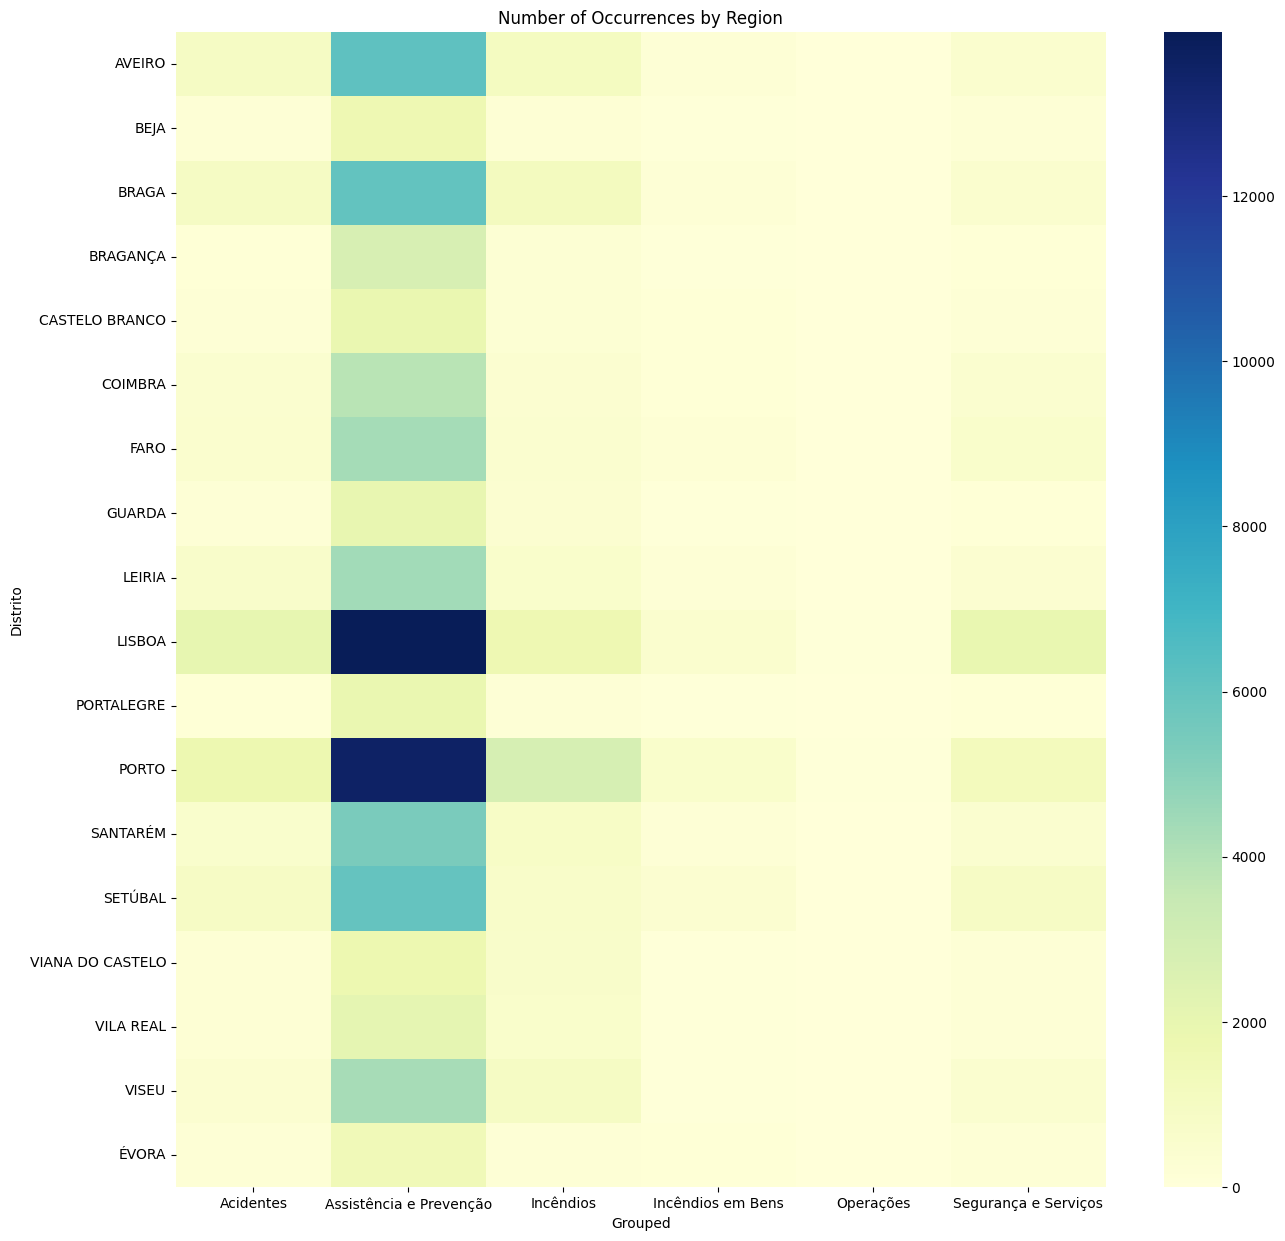

In [8]:
occurrences_by_region = data.groupby(['Distrito','Grouped']).size().reset_index(name='Occurrences')
occurrences_by_region = occurrences_by_region.pivot_table(index=['Distrito'], columns='Grouped', values='Occurrences').fillna(0)

plt.figure(figsize=(15, 15))
sns.heatmap(occurrences_by_region, cmap="YlGnBu")
plt.title("Number of Occurrences by Region")
plt.show()

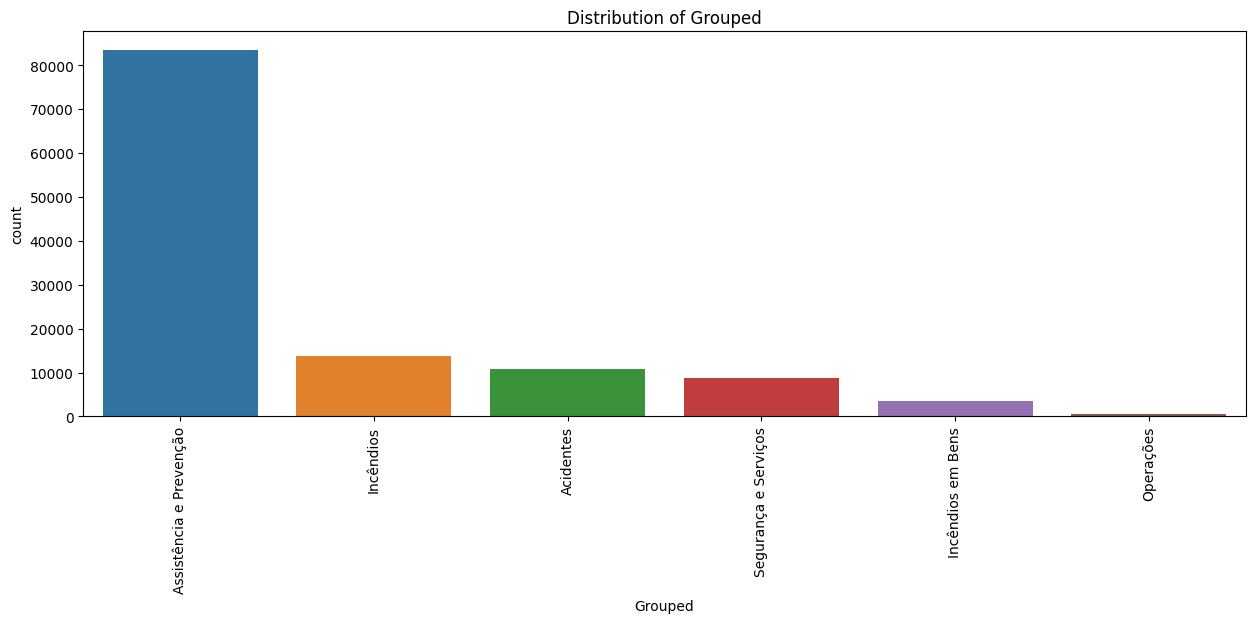

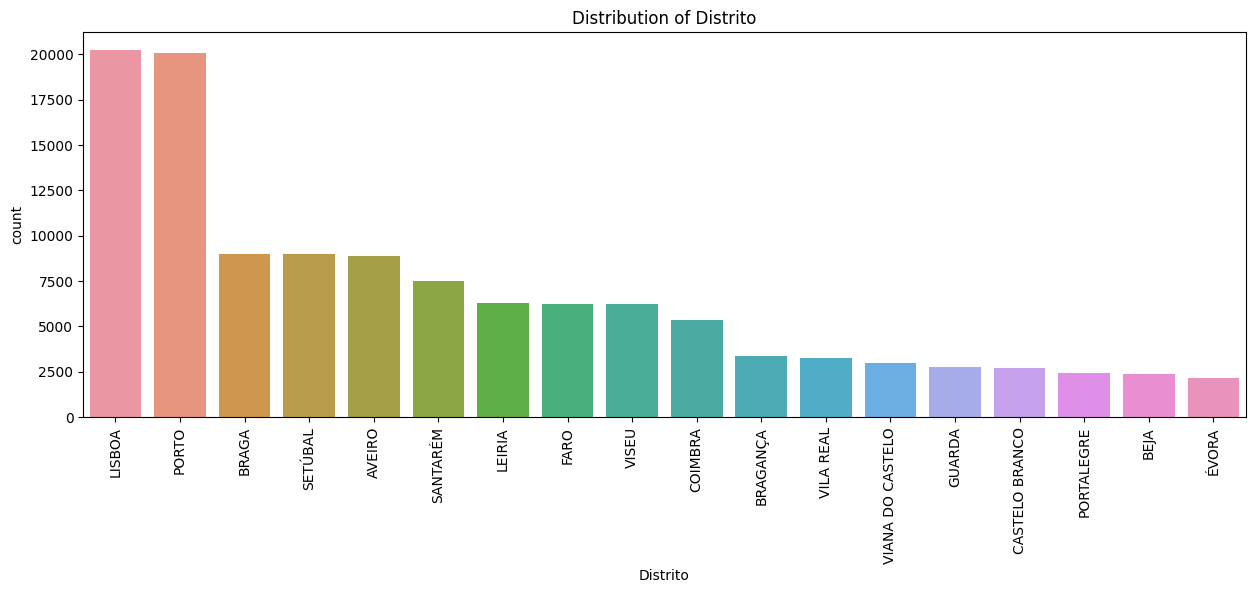

In [9]:
def plot_categorical_distribution(column):
    plt.figure(figsize=(15, 5))
    sns.countplot(x=column, data=data, order=data[column].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"Distribution of {column}")
    plt.show()
categorical_columns = ['Grouped','Distrito']
for column in categorical_columns:
    plot_categorical_distribution(column)

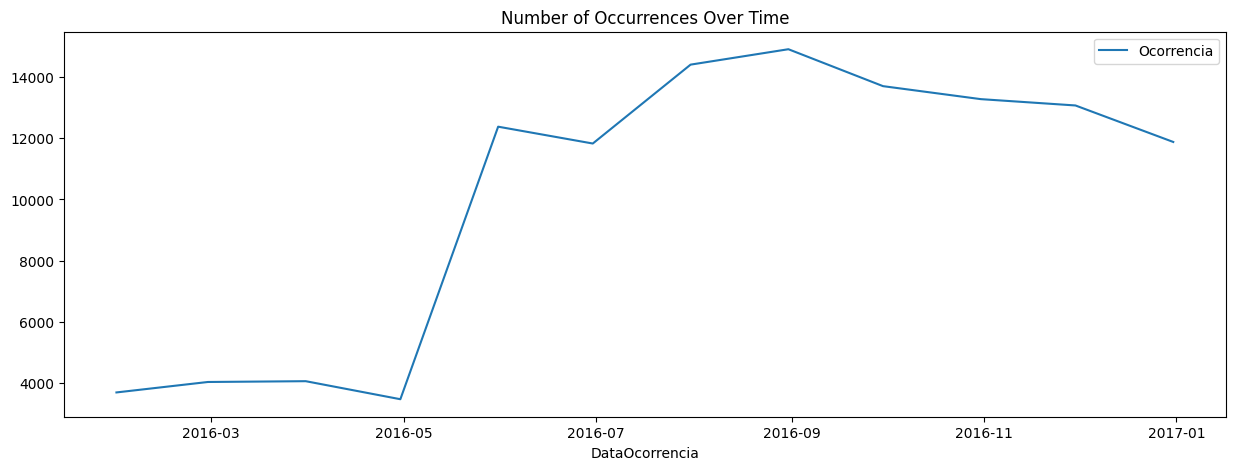

In [10]:
occurrences_per_month = data[['DataOcorrencia']].copy()
occurrences_per_month['DataOcorrencia'] = pd.to_datetime(occurrences_per_month['DataOcorrencia'])
occurrences_per_month = occurrences_per_month.set_index('DataOcorrencia')
occurrences_per_month['Ocorrencia'] = 1
occurrences_per_month = occurrences_per_month.resample('M').sum()

plt.figure(figsize=(15, 5))
sns.lineplot(data=occurrences_per_month)
plt.title("Number of Occurrences Over Time")
plt.show()

In [11]:
data['DataOcorrencia'] = pd.to_datetime(data['DataOcorrencia'])
data['DataFechoOperacional'] = pd.to_datetime(data['DataFechoOperacional'])
data['DuracaoEvento'] = (data['DataFechoOperacional'] - data['DataOcorrencia']).dt.total_seconds()/3600
data['AnoOcorrencia'] = data['DataOcorrencia'].dt.year
data['MesOcorrencia'] = data['DataOcorrencia'].dt.month
data['DiaOcorrencia'] = data['DataOcorrencia'].dt.day
data['HoraOcorrencia'] = data['DataOcorrencia'].dt.hour

data = data.drop(columns=['DataOcorrencia', 'DataFechoOperacional'])

/tmp/ipykernel_9516/1566074172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DataOcorrencia'] = pd.to_datetime(data['DataOcorrencia'])
/tmp/ipykernel_9516/1566074172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DataFechoOperacional'] = pd.to_datetime(data['DataFechoOperacional'])
/tmp/ipykernel_9516/1566074172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [12]:
data.head()

,Numero,Natureza,EstadoOcorrencia,Distrito,Concelho,Freguesia,Localidade,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos,Grouped,DuracaoEvento,AnoOcorrencia,MesOcorrencia,DiaOcorrencia,HoraOcorrencia
0,2016150002576,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,SETÚBAL,MOITA,Gaio-Rosário e Sarilhos Pequenos,Gaio- Rosario,"38,68091202","-9,002235449",1.0,3.0,0.0,0.0,Assistência e Prevenção,3.466667,2016,9,1,14
2,2016020002249,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,BEJA,CASTRO VERDE,Castro Verde e Casével,"CASTRO VERDE-Rua Bento J. Carraça,6","37,71278977","-8,091107843",2.0,4.0,0.0,0.0,Assistência e Prevenção,0.933333,2016,1,24,18
4,2016020003825,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,BEJA,CASTRO VERDE,Santa Bárbara de Padrões,"SETE-Rua da Graça, 4","37,6149714","-7,962115173",1.0,2.0,0.0,0.0,Assistência e Prevenção,1.416667,2016,2,13,0
5,2016110048171,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,LISBOA,MAFRA,Encarnação,Barril,"39,05063999","-9,403775952",1.0,2.0,0.0,0.0,Assistência e Prevenção,1.850000,2016,3,14,19
6,2016180014340,Riscos Mistos / Incêndios Rurais / Povoamento ...,Encerrada,VISEU,RESENDE,São Martinho de Mouros,SÃO MARTINHO DE MOUROS,"41,100792","-7,895058",2.0,7.0,0.0,0.0,Incêndios,3.100000,2016,3,14,19


In [13]:
data = data.drop(columns=['Concelho', 'Freguesia', 'Natureza','Localidade','Numero'])

In [14]:
data = data.drop(columns=['EstadoOcorrencia'])

In [15]:
data.head()

,Distrito,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos,Grouped,DuracaoEvento,AnoOcorrencia,MesOcorrencia,DiaOcorrencia,HoraOcorrencia
0,SETÚBAL,"38,68091202","-9,002235449",1.0,3.0,0.0,0.0,Assistência e Prevenção,3.466667,2016,9,1,14
2,BEJA,"37,71278977","-8,091107843",2.0,4.0,0.0,0.0,Assistência e Prevenção,0.933333,2016,1,24,18
4,BEJA,"37,6149714","-7,962115173",1.0,2.0,0.0,0.0,Assistência e Prevenção,1.416667,2016,2,13,0
5,LISBOA,"39,05063999","-9,403775952",1.0,2.0,0.0,0.0,Assistência e Prevenção,1.850000,2016,3,14,19
6,VISEU,"41,100792","-7,895058",2.0,7.0,0.0,0.0,Incêndios,3.100000,2016,3,14,19


In [16]:
categorical_columns = ['Grouped', 'Distrito']
data = pd.get_dummies(data, columns=categorical_columns)

In [17]:
data.head()

,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos,DuracaoEvento,AnoOcorrencia,MesOcorrencia,DiaOcorrencia,...,Distrito_LEIRIA,Distrito_LISBOA,Distrito_PORTALEGRE,Distrito_PORTO,Distrito_SANTARÉM,Distrito_SETÚBAL,Distrito_VIANA DO CASTELO,Distrito_VILA REAL,Distrito_VISEU,Distrito_ÉVORA
0,"38,68091202","-9,002235449",1.0,3.0,0.0,0.0,3.466667,2016,9,1,...,0,0,0,0,0,1,0,0,0,0
2,"37,71278977","-8,091107843",2.0,4.0,0.0,0.0,0.933333,2016,1,24,...,0,0,0,0,0,0,0,0,0,0
4,"37,6149714","-7,962115173",1.0,2.0,0.0,0.0,1.416667,2016,2,13,...,0,0,0,0,0,0,0,0,0,0
5,"39,05063999","-9,403775952",1.0,2.0,0.0,0.0,1.850000,2016,3,14,...,0,1,0,0,0,0,0,0,0,0
6,"41,100792","-7,895058",2.0,7.0,0.0,0.0,3.100000,2016,3,14,...,0,0,0,0,0,0,0,0,1,0


In [18]:
len(data.columns)

35

In [19]:
data['Latitude'] = data['Latitude'].str.replace(',', '.').astype(float)
data['Longitude'] = data['Longitude'].str.replace(',', '.').astype(float)

In [20]:
scaler = MinMaxScaler()
numerical_columns = ['Latitude', 'Longitude', 'DuracaoEvento']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [21]:
data.head()

,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos,DuracaoEvento,AnoOcorrencia,MesOcorrencia,DiaOcorrencia,...,Distrito_LEIRIA,Distrito_LISBOA,Distrito_PORTALEGRE,Distrito_PORTO,Distrito_SANTARÉM,Distrito_SETÚBAL,Distrito_VIANA DO CASTELO,Distrito_VILA REAL,Distrito_VISEU,Distrito_ÉVORA
0,0.000040,0.998153,1.0,3.0,0.0,0.0,0.479019,2016,9,1,...,0,0,0,0,0,1,0,0,0,0
2,0.000017,0.998249,2.0,4.0,0.0,0.0,0.478863,2016,1,24,...,0,0,0,0,0,0,0,0,0,0
4,0.000015,0.998263,1.0,2.0,0.0,0.0,0.478893,2016,2,13,...,0,0,0,0,0,0,0,0,0,0
5,0.000049,0.998110,1.0,2.0,0.0,0.0,0.478919,2016,3,14,...,0,1,0,0,0,0,0,0,0,0
6,0.000099,0.998270,2.0,7.0,0.0,0.0,0.478996,2016,3,14,...,0,0,0,0,0,0,0,0,1,0


In [23]:
numerical_columns = ['NumeroMeiosTerrestresEnvolvidos', 'NumeroOperacionaisTerrestresEnvolvidos', 'NumeroMeiosAereosEnvolvidos', 'NumeroOperacionaisAereosEnvolvidos']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [24]:
data.head()

,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos,DuracaoEvento,AnoOcorrencia,MesOcorrencia,DiaOcorrencia,...,Distrito_LEIRIA,Distrito_LISBOA,Distrito_PORTALEGRE,Distrito_PORTO,Distrito_SANTARÉM,Distrito_SETÚBAL,Distrito_VIANA DO CASTELO,Distrito_VILA REAL,Distrito_VISEU,Distrito_ÉVORA
0,0.000040,0.998153,0.002941,0.001382,0.0,0.0,0.479019,2016,9,1,...,0,0,0,0,0,1,0,0,0,0
2,0.000017,0.998249,0.005882,0.001843,0.0,0.0,0.478863,2016,1,24,...,0,0,0,0,0,0,0,0,0,0
4,0.000015,0.998263,0.002941,0.000922,0.0,0.0,0.478893,2016,2,13,...,0,0,0,0,0,0,0,0,0,0
5,0.000049,0.998110,0.002941,0.000922,0.0,0.0,0.478919,2016,3,14,...,0,1,0,0,0,0,0,0,0,0
6,0.000099,0.998270,0.005882,0.003226,0.0,0.0,0.478996,2016,3,14,...,0,0,0,0,0,0,0,0,1,0


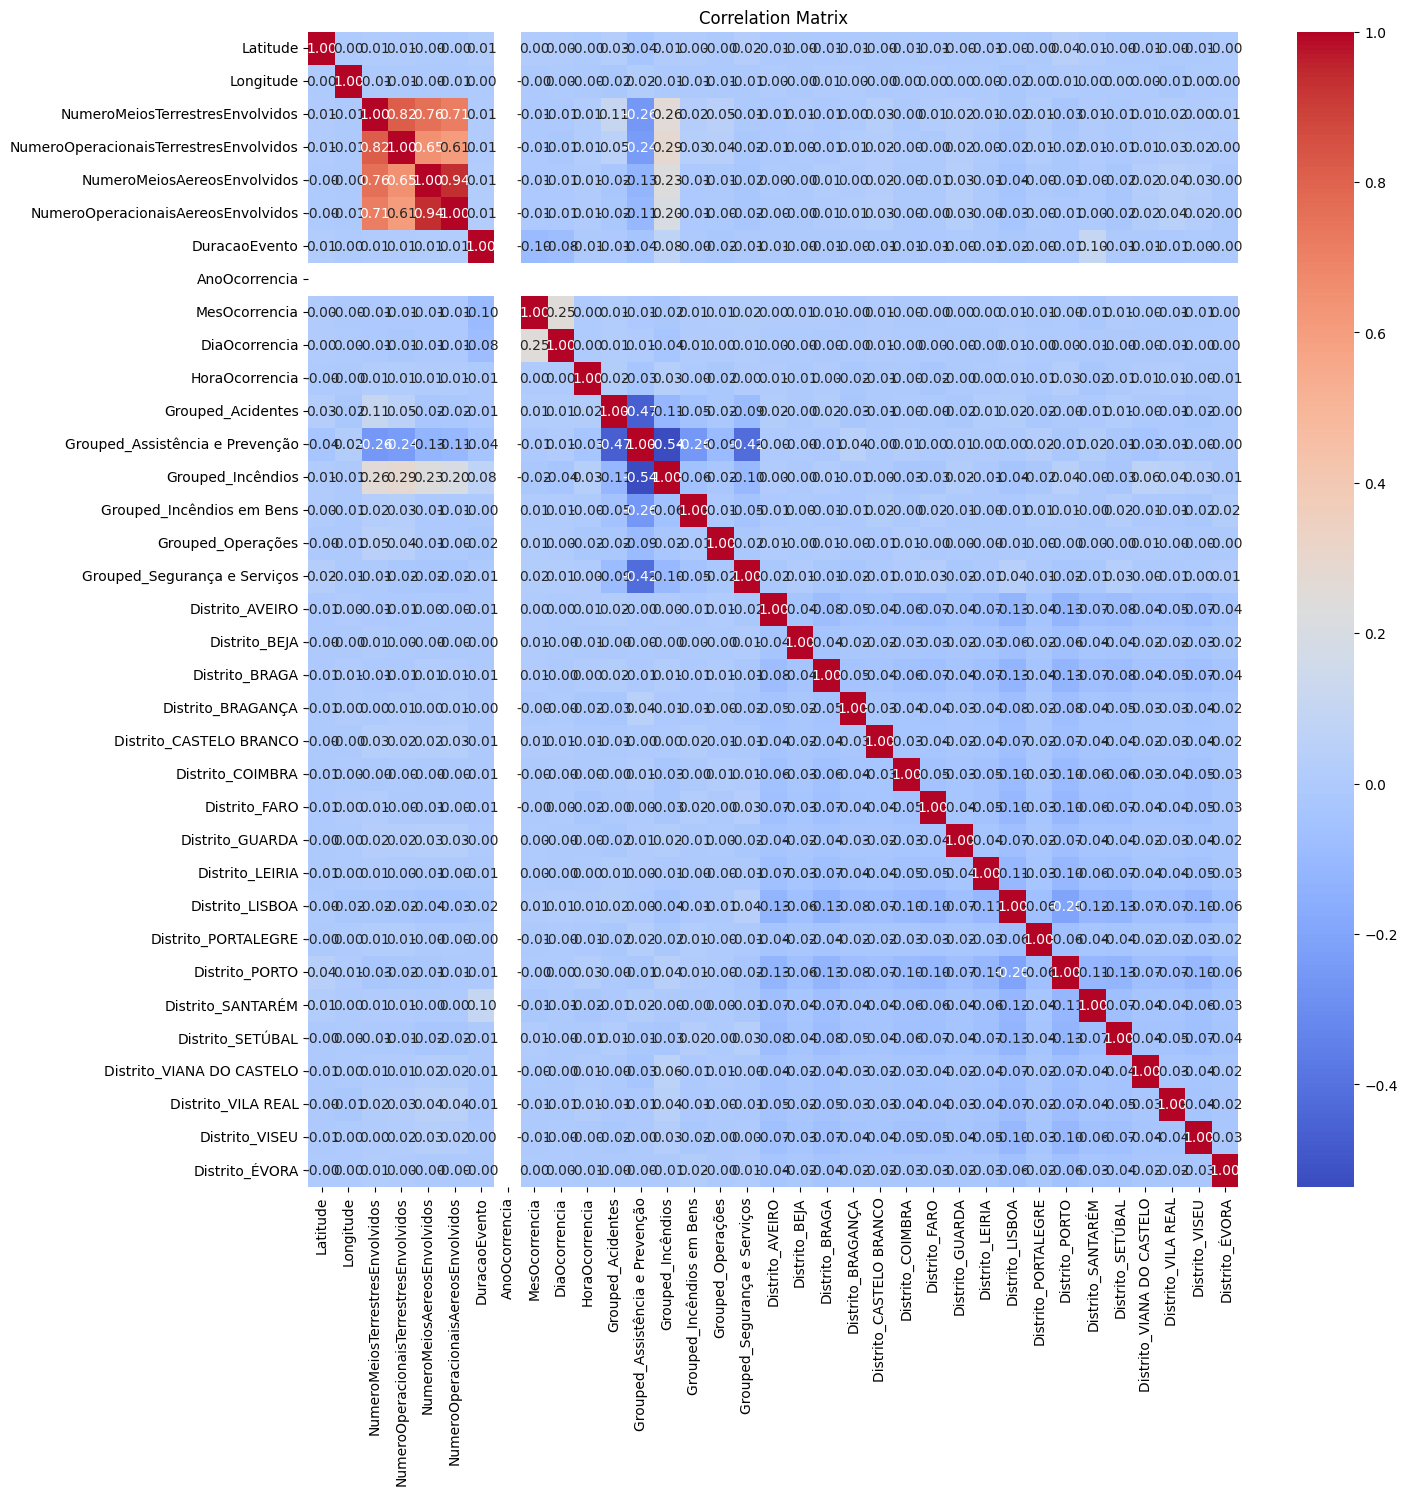

In [25]:
correlation_matrix = data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [26]:
data.to_csv("data/anpc-2016-preprocessed-normalized.csv")